$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

----------------------------

# `02` Load Data

In [3]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [4]:
data = pd.read_csv(Path("datasets/housing/housing.csv"))
X_train = data.drop("median_house_value", axis=1)
y_train = data["median_house_value"]
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    random_state=1234, 
                                                    test_size=0.2, 
                                                    shuffle=True)
  

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
duplicates = data.duplicated()
data[duplicates]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

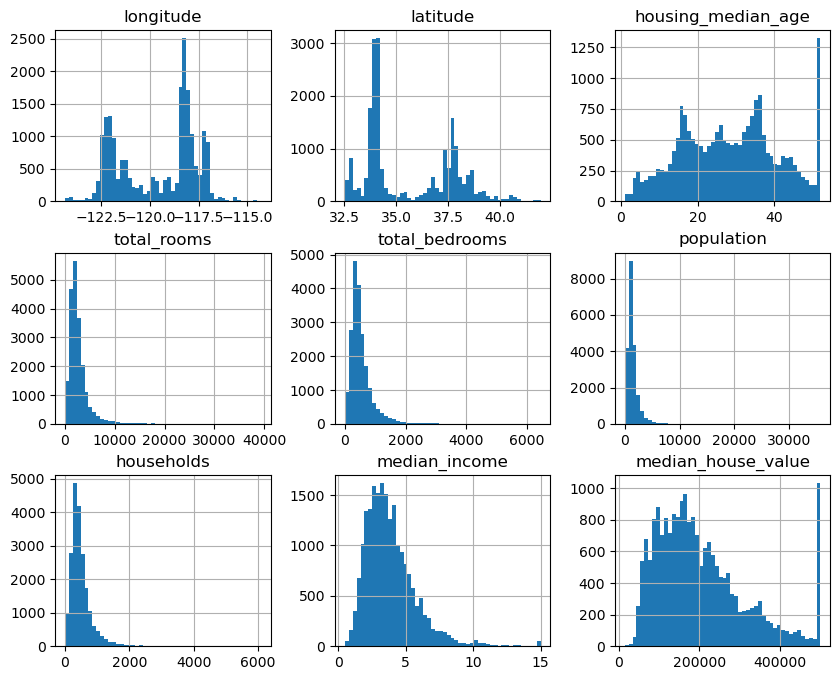

In [11]:
data.hist(bins=50, figsize=(10, 8))
plt.show()

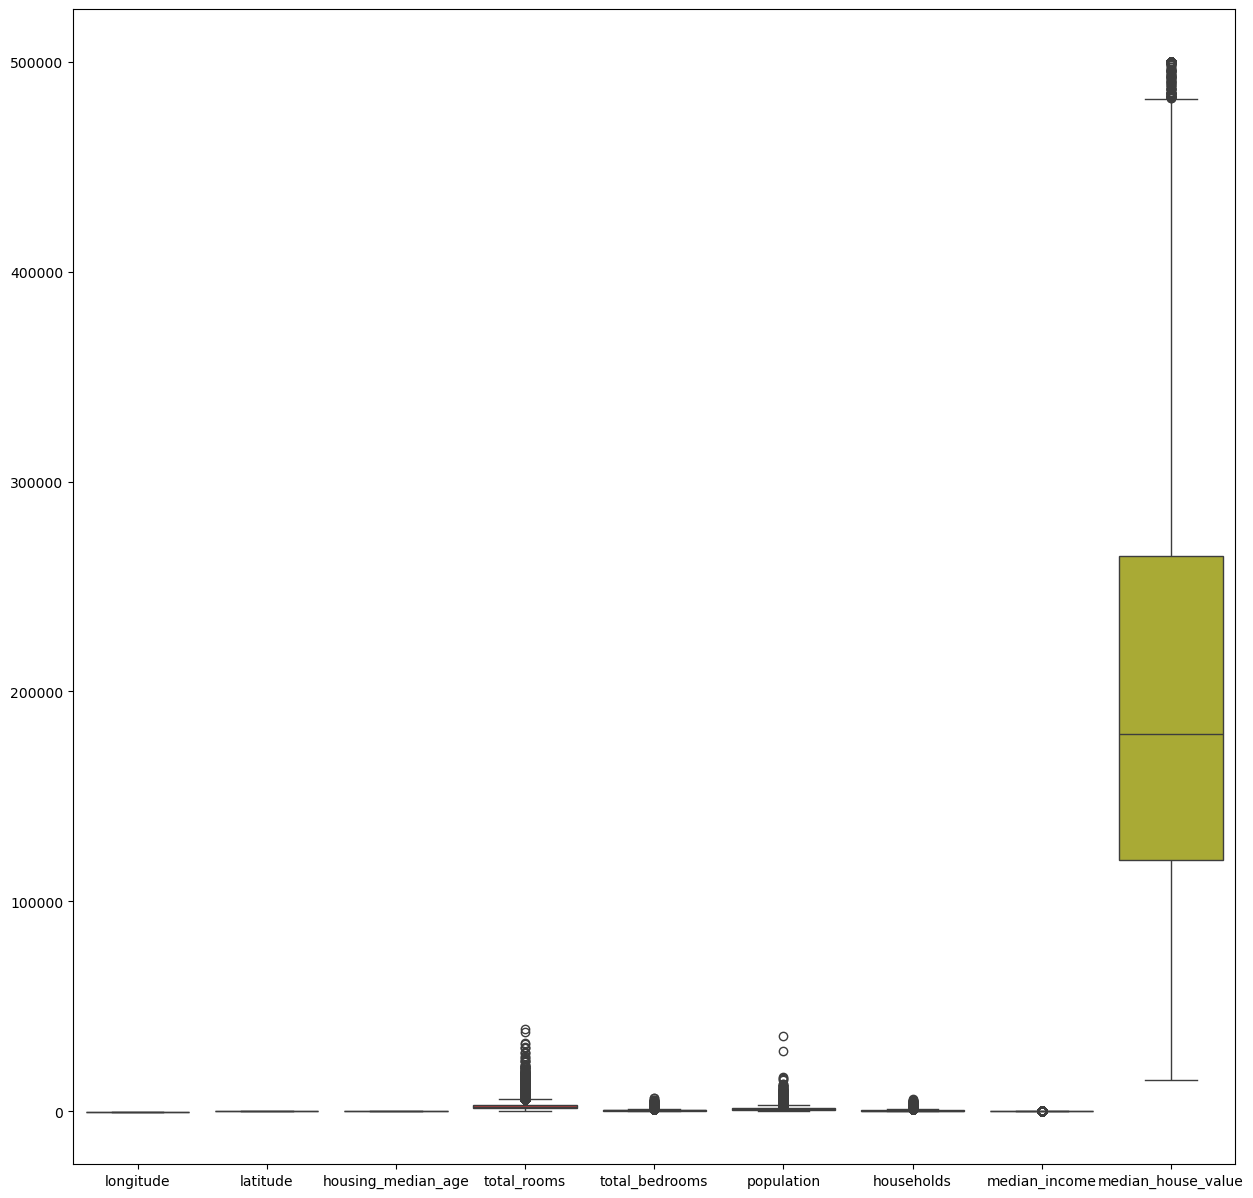

In [12]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=data)
plt.show()

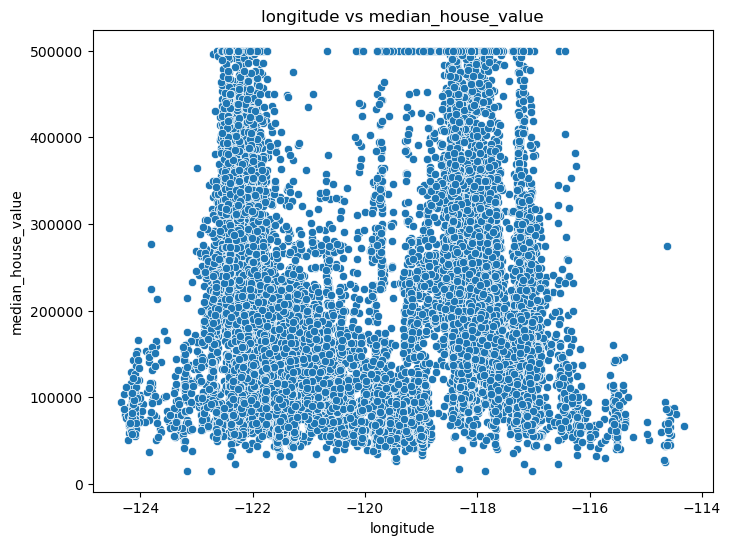

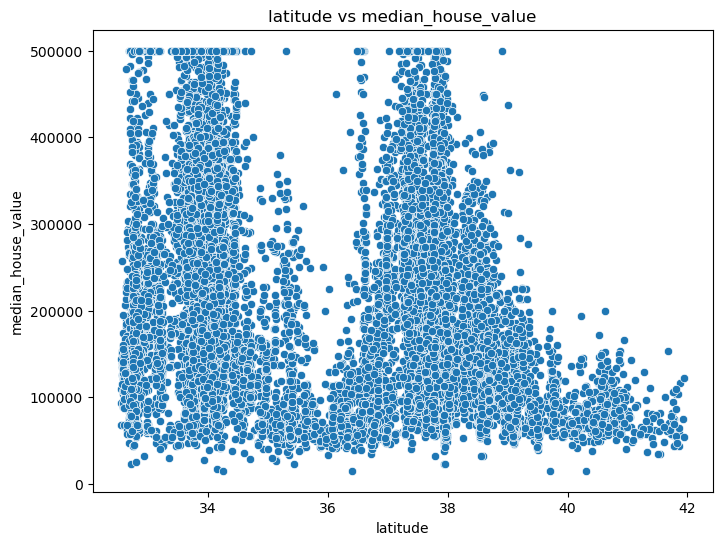

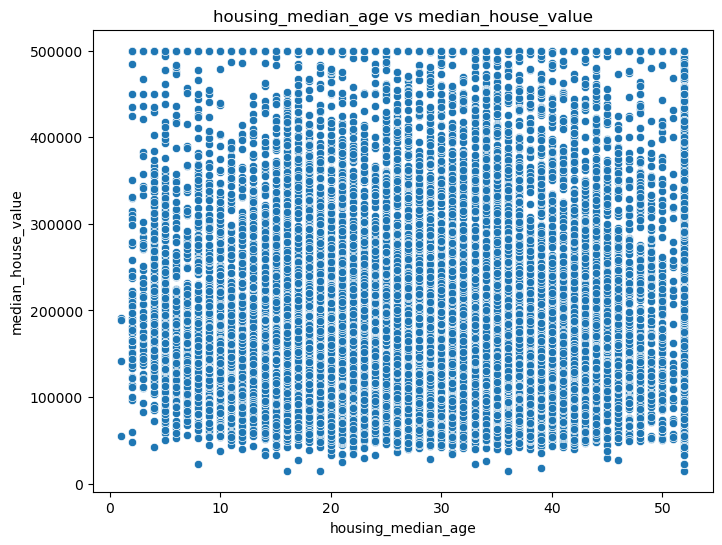

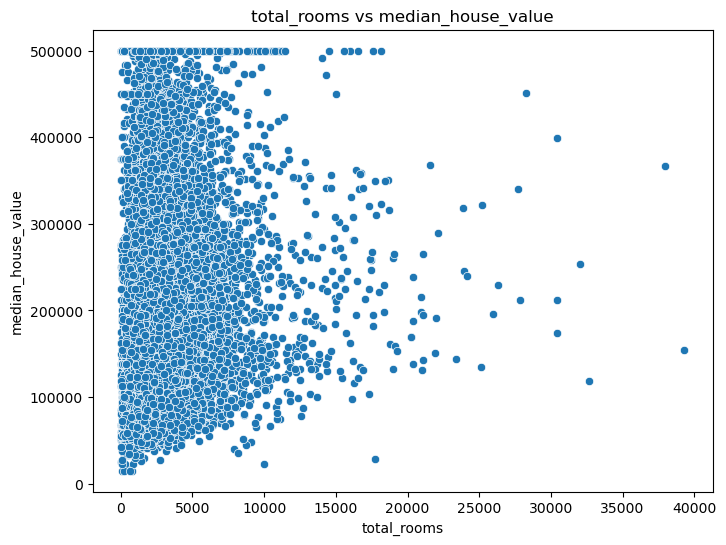

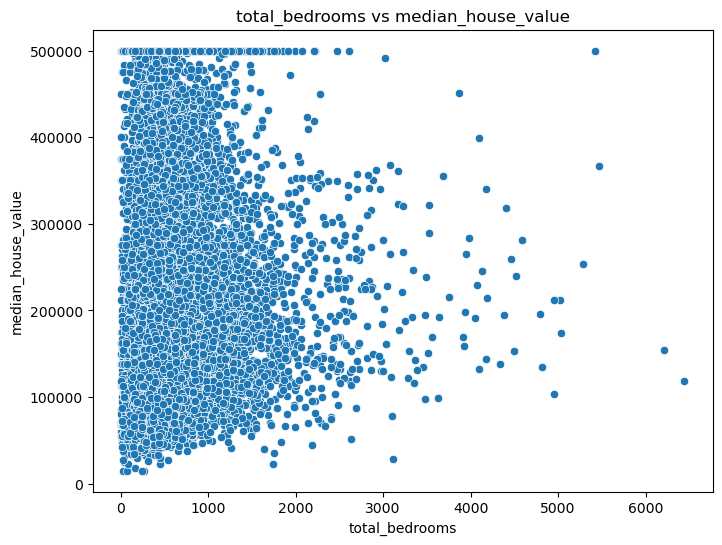

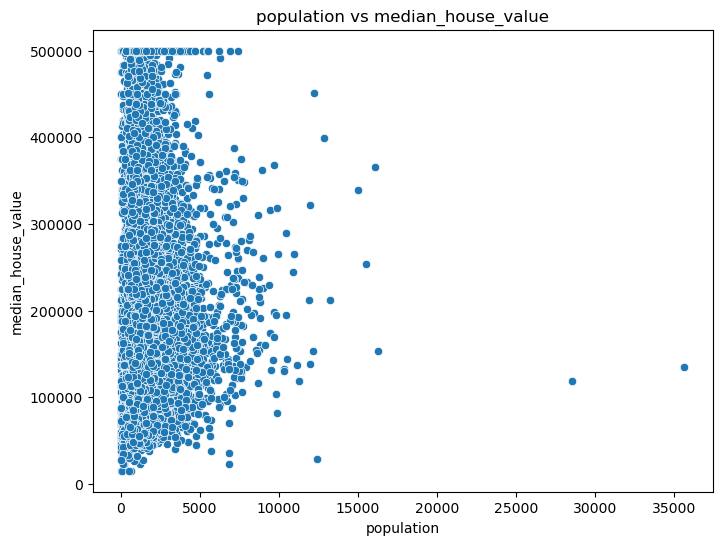

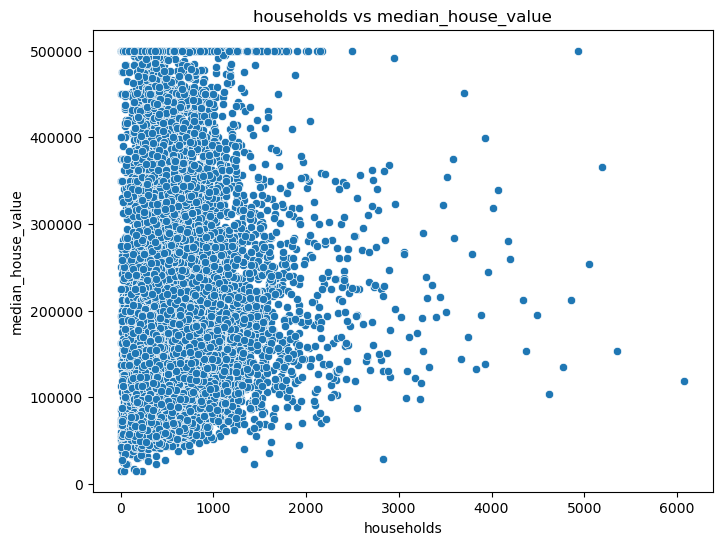

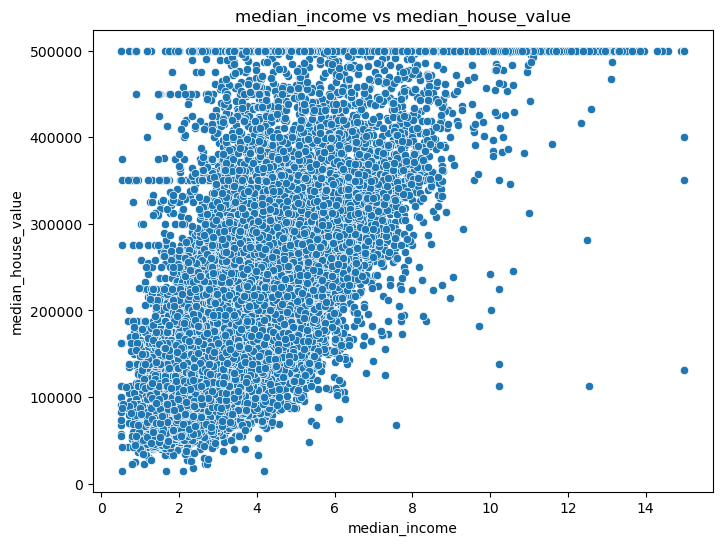

In [12]:
features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", 
            "households", "median_income"]
label = "median_house_value"

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data[label])
    plt.title(f"{feature} vs {label}")
    plt.show()

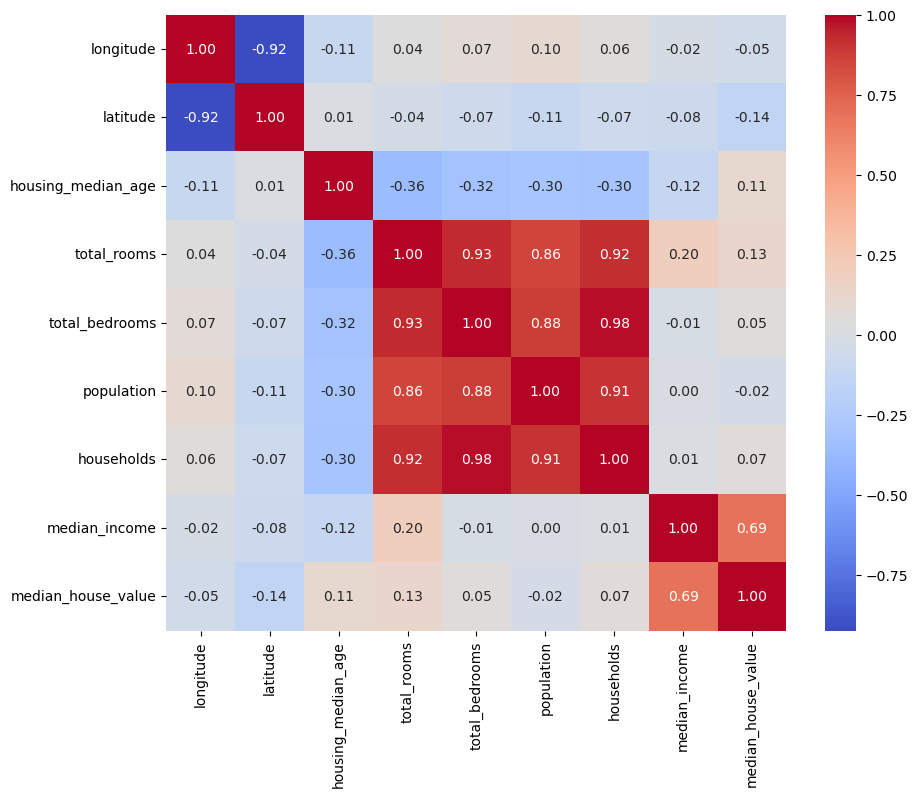

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [14]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_19423/1676755818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [37]:
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-53033.43529589 -54567.88412987  13703.60360078  -9449.48282544
  28761.88980988 -47944.49394427  33160.93354043  73792.06566283
 -18009.4630801    2156.36556168  -1104.2904607    1843.82962609]
Intercept: 207185.6753270349


## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [38]:
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 69698.1693093369
MAE: 50051.832130197945
R²: 0.6292554108926797


----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [39]:
baseline_model = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.01, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='constant', penalty=None, random_state=42)

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [40]:
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 69698.1693093369
MAE: 50051.832130197945
R²: 0.6292554108926797


## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [41]:
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train.ravel())  
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

param_grid = {'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}
grid_search = GridSearchCV(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train.ravel())  

print("Best learning rate:", grid_search.best_params_['learning_rate'])


/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_19423/1225886763.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train_scaled, y_train.ravel())
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_19423/1225886763.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train_scaled, y_train.ravel())
/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before co

Best learning rate: adaptive


## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [42]:
model_l1 = SGDRegressor(penalty='l1', max_iter=1000, tol=1e-3, random_state=42)
model_l1.fit(X_train_scaled, y_train)
y_pred_l1 = model_l1.predict(X_test_scaled)
rmse_l1 = np.sqrt(mean_squared_error(y_test, y_pred_l1))
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
r2_l1 = r2_score(y_test, y_pred_l1)

In [25]:
model_l2 = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
model_l2.fit(X_train_scaled, y_train)
y_pred_l2 = model_l2.predict(X_test_scaled)
rmse_l2 = np.sqrt(mean_squared_error(y_test, y_pred_l2))
mae_l2 = mean_absolute_error(y_test, y_pred_l2)
r2_l2 = r2_score(y_test, y_pred_l2)

In [28]:
print("L1 Regularization (Lasso) - RMSE:", rmse_l1)
print("L1 Regularization (Lasso) - MAE:", mae_l1)
print("L1 Regularization (Lasso) - R²:", r2_l1)

print("L2 Regularization (Ridge) - RMSE:", rmse_l2)
print("L2 Regularization (Ridge) - MAE:", mae_l2)
print("L2 Regularization (Ridge) - R²:", r2_l2)

L1 Regularization (Lasso) - RMSE: 15960236621.446964
L1 Regularization (Lasso) - MAE: 545866556.1171851
L1 Regularization (Lasso) - R²: -19440647727.2186
L2 Regularization (Ridge) - RMSE: 16085873986.86417
L2 Regularization (Ridge) - MAE: 547808657.4584347
L2 Regularization (Ridge) - R²: -19747922019.680004


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [44]:
model_l2 = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
model_l2.fit(X_train_scaled, y_train.ravel())  

final_model = model_l2
y_pred_final = final_model.predict(X_test_scaled)

mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Model Performance on Test Set:")
print(f"MAE: {mae_final:.4f}")
print(f"RMSE: {rmse_final:.4f}")
print(f"R² Score: {r2_final:.4f}")


Final Model Performance on Test Set:
MAE: 547808657.4584
RMSE: 16085873986.8642
R² Score: -19747922019.6800


/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_19423/3975882800.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model_l2.fit(X_train_scaled, y_train.ravel())


-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$